# Baroclinic Eddies

In [1]:
%matplotlib inline

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import lib

In [4]:
data = scipy.io.loadmat('../data/m62_bcl_ch_131028.mat')

Range of horizontal viscosities across which experiments were run.

In [5]:
nu_h = [1, 5, 10, 20, 200]

# Figure 11
Normalised RPE for 4km horizontal resolution case. The evolution is about twice as high in MOM6, as compared to MPAS. We're showing the MPAS runs in solid lines, with MOM6 in dashes.

In [8]:
rpeNorm_g = {}
for nu in nu_h:
    rpeNorm_g[nu] = lib.rpe_norm('/scratch/mizuchi1/angus/spurious/baroclinic_eddies/baroclinic_eddies_DX4/baroclinic_eddies_DX4_KH{}/prog.nc'.format(nu), step=1)

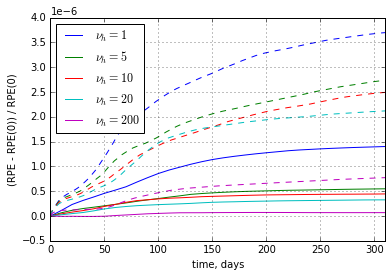

In [9]:
for j, nu in enumerate(data['nu_h'][0]):
    plt.plot(data['time'][0] / 3600 / 24, data['rpeNorm'][:,j])
    
plt.gca().set_prop_cycle(None)
    
for nu in nu_h:
    plt.plot(rpeNorm_g[nu][0], rpeNorm_g[nu][1], '--')
    
plt.gca().set_xlim(0, 310)
#plt.gca().set_ylim(0, 14e-7)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('time, days')
plt.ylabel('(RPE - RPE(0)) / RPE(0)')
plt.legend([r'$\nu_h = {}$'.format(nu) for nu in data['nu_h'][0]], loc='upper left')
plt.grid()

# Figure 12a

In [44]:
drpe_mom6 = np.array([lib.drpe_dt('/scratch/mizuchi1/angus/spurious/baroclinic_eddies/baroclinic_eddies_DX10/baroclinic_eddies_DX10_KH{}/prog.nc'.format(nu)) for nu in nu_h])
vel_scale = np.array([lib.vel_scale('/scratch/mizuchi1/angus/spurious/baroclinic_eddies/baroclinic_eddies_DX10/baroclinic_eddies_DX10_KH{}/ocean.stats.nc'.format(nu)) for nu in nu_h])
gridRe_mom6 = np.mean(vel_scale, 1) * 10e3 / np.array(list(map(float, nu_h)))

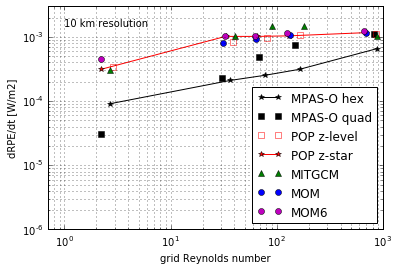

In [45]:
quad_data = scipy.io.loadmat('../data/m83QuadHex10km.mat')
pop_data  = scipy.io.loadmat('../data/pop_10km_140127.mat')

# MPAS-O hex
vel_scale = np.sqrt(2 * data['keMeanTime10km'][0])
gridRe = 10e3 * vel_scale[5:10] / data['nu_h'][0]
plt.loglog(gridRe, data['meanDrpeDt10km320day'][0,5:10], '-k*')

# MPAS-O quad
vel_scale = np.sqrt(2 * quad_data['keMeanTimeQuadHex10km'][0])
gridRe = 10e3 * vel_scale[0:5] / data['nu_h'][0]
plt.loglog(gridRe, quad_data['meanDrpeDtQuadHex10km'][0,0:5], 'ks')

# POP
vel_scale = np.sqrt(2 * pop_data['keMeanTime10kmPOP'][0])
m = "s*"
l = " -"
for j in range(2):
    gridRe = 10e3 * vel_scale[j*5:(j+1)*5] / data['nu_h'][0]
    kwargs = {'marker': m[j], 'linestyle': l[j]}
    if j == 0:
        kwargs['markerfacecolor'] = 'none'
        kwargs['markeredgecolor'] = 'red'
    plt.loglog(gridRe, pop_data['meanDrpeDt10kmPOP'][0,j*5:(j+1)*5], 'r', **kwargs)
    
plt.loglog(data['mitgcm_10km_Re'][0], data['mitgcm_10km_drpe_dt'][:,0], '^g')
plt.loglog(data['mom_10km_Re'][0], data['mom_10km_drpe_dt'][:,0], 'ob')

plt.loglog(gridRe_mom6, np.mean(drpe_mom6, 1), 'om')

plt.gca().set_xlim(.7, 1e3)
plt.gca().set_ylim(1e-6, 3e-3)
plt.grid(which='both')
plt.legend(['MPAS-O hex', 'MPAS-O quad', 'POP z-level', 'POP z-star', 'MITGCM', 'MOM', 'MOM6'], loc='lower right')
plt.text(1, 1.5e-3, '10 km resolution')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')

# Figure 12b

We can add MOM6 to this suite of models. The performance is very similar across all models, with a significant improvement only for hexagonal MPAS (but this has some implications for the horizontal resolution).

In [10]:
drpe_mom6 = np.array([lib.drpe_dt('/scratch/mizuchi1/angus/spurious/baroclinic_eddies/baroclinic_eddies_DX4/baroclinic_eddies_DX4_KH{}/prog.nc'.format(nu)) for nu in nu_h])
vel_scale = np.array([lib.vel_scale('/scratch/mizuchi1/angus/spurious/baroclinic_eddies/baroclinic_eddies_DX4/baroclinic_eddies_DX4_KH{}/ocean.stats.nc'.format(nu)) for nu in nu_h])
gridRe_mom6 = np.mean(vel_scale, 1) * 4e3 / np.array(list(map(float, nu_h)))

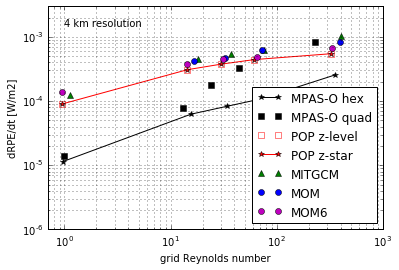

In [39]:
quad_data = scipy.io.loadmat('../data/m83QuadHex4km.mat')
pop_data  = scipy.io.loadmat('../data/pop_4km_140127.mat')

# MPAS-O hex
vel_scale = np.sqrt(2 * data['keMeanTime4km'][0])
gridRe = 4e3 * vel_scale[5:10] / data['nu_h'][0]
plt.loglog(gridRe, data['meanDrpeDt4km320day'][0,5:10], '-k*')

# MPAS-O quad
vel_scale = np.sqrt(2 * quad_data['keMeanTimeQuadHex4km'][0])
gridRe = 4e3 * vel_scale[0:5] / data['nu_h'][0]
plt.loglog(gridRe, quad_data['meanDrpeDtQuadHex4km'][0,0:5], 'ks')

# POP
vel_scale = np.sqrt(2 * pop_data['keMeanTime4kmPOP'][0])
m = "s*"
l = " -"
for j in range(2):
    gridRe = 4e3 * vel_scale[j*5:(j+1)*5] / data['nu_h'][0]
    kwargs = {'marker': m[j], 'linestyle': l[j]}
    if j == 0:
        kwargs['markerfacecolor'] = 'none'
        kwargs['markeredgecolor'] = 'red'
    plt.loglog(gridRe, pop_data['meanDrpeDt4kmPOP'][0,j*5:(j+1)*5], 'r', **kwargs)
    
plt.loglog(data['mitgcm_4km_Re'][0], data['mitgcm_4km_drpe_dt'][:,0], '^g')
plt.loglog(data['mom_4km_Re'][0], data['mom_4km_drpe_dt'][:,0], 'ob')

plt.loglog(gridRe_mom6, np.mean(drpe_mom6, 1), 'om')

plt.gca().set_xlim(.7, 1e3)
plt.gca().set_ylim(1e-6, 3e-3)
plt.grid(which='both')
plt.legend(['MPAS-O hex', 'MPAS-O quad', 'POP z-level', 'POP z-star', 'MITGCM', 'MOM', 'MOM6'], loc='lower right')
plt.text(1, 1.5e-3, '4 km resolution')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')

# Figure 12c

In [28]:
data['meanDrpeDt1km100day'][0,0] = 1.593383e-4

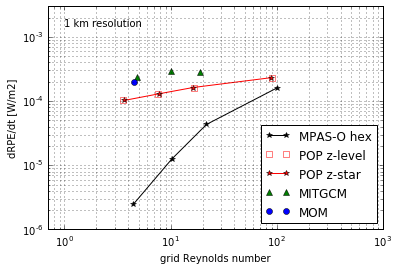

In [43]:
pop_data = scipy.io.loadmat('../data/pop_1km_140127.mat')

# MPAS-O hex
vel_scale = np.sqrt(2 * data['keMeanTime1km'][0])
gridRe = 1e3 * vel_scale[0:5] / data['nu_h'][0]
plt.loglog(gridRe, data['meanDrpeDt1km100day'][0,0:5], 'k*-')

# POP
vel_scale = np.sqrt(2 * pop_data['keMeanTime1km'][0])
m = "s*"
l = " -"
for j in range(2):
    gridRe = 1e3 * vel_scale[j*5:(j+1)*5] / data['nu_h'][0]
    kwargs = {'marker': m[j], 'linestyle': l[j]}
    if j == 0:
        kwargs['markerfacecolor'] = 'none'
        kwargs['markeredgecolor'] = 'red'
    plt.loglog(gridRe[:4], pop_data['meanDrpeDt1km'][0,:4], 'r', **kwargs)
    
plt.loglog(data['mitgcm_1km_Re'][0], data['mitgcm_1km_drpe_dt'][:,0], '^g')
plt.loglog(data['mom_1km_Re'][0], data['mom_1km_drpe_dt'][:,0], 'ob')

plt.gca().set_xlim(.7, 1e3)
plt.gca().set_ylim(1e-6, 3e-3)
plt.grid(which='both')
plt.legend(['MPAS-O hex', 'POP z-level', 'POP z-star', 'MITGCM', 'MOM'], loc='lower right')
plt.text(1, 1.5e-3, '1 km resolution')
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')

# dRPE/dt split

We can also take a look at the major contribution to RPE changes in MOM6. It seems that the horizontal effects are about an order of magnitude more significant than the vertical.

In [11]:
drpe_s = np.array([lib.drpe_dt_split('../mine/baroclinic_eddies_split_4_KH{}.nc'.format(nu)) for nu in nu_h])

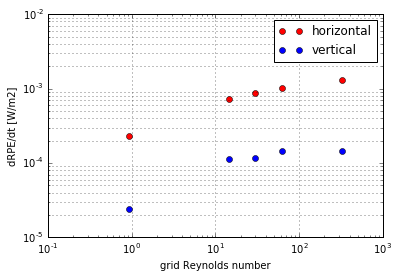

In [13]:
for k in range(len(nu_h)):
    plt.loglog(gridRe[k], drpe_s[k][0].mean(), 'or')
    plt.loglog(gridRe[k], drpe_s[k][1].mean(), 'ob')
    
plt.legend(['horizontal', 'vertical'])
plt.xlabel('grid Reynolds number')
plt.ylabel('dRPE/dt [W/m2]')
plt.grid(which='both', axis='y')
plt.grid()